### 1.Single-variable integration (Quadrature)

* quad, dblquad, tplquad: Compute definite integrals.

* fixed_quad, quadrature: Fixed-order Gaussian quadrature.

### 2.Multiple-variable integration

* nquad: For n-dimensional integrals with adaptive integration.

### 3.ODE Solvers (Differential Equations)

* solve_ivp: General ODE solver with multiple methods (RK45, RK23, BDF, etc.).

* odeint: Legacy solver for first-order ODEs (uses LSODA).



## 1. Single-Variable Integration
The quad function computes definite integrals using adaptive quadrature.

In [8]:
from scipy.integrate import quad

# Define function to integrate
def f(x):
    return x**2  # Simple function x^2

# Integrate f(x) from 0 to 2
result, error = quad(f, 0, 2)
print(f"Integral Result: {result}, Estimated Error: {error}")

Integral Result: 2.666666666666667, Estimated Error: 2.960594732333751e-14


### Breakdown:
* quad(f, a, b): Integrates f(x) from a to b using adaptive quadrature.

* Returns:

    * The computed integral.

    * An estimate of the numerical error.

### Handling Infinite Limits
Use np.inf for improper integrals:

In [1]:
from scipy.integrate import quad
import numpy as np

result, error = quad(lambda x: np.exp(-x), 0, np.inf)
print(f"Integral Result: {result}")  # Expected 1 (integral of e^(-x) from 0 to ∞)

Integral Result: 1.0000000000000002


## 2. Multiple Integrals
For double and triple integrals, use dblquad and tplquad.

In [2]:
from scipy.integrate import dblquad

# Define function f(x, y)
def f(x, y):
    return x * y  # Example function

# Integrate f(x, y) over x: [0, 2], y: [0, 3]
result, error = dblquad(f, 0, 2, lambda x: 0, lambda x: 3)
print(f"Double Integral Result: {result}")


Double Integral Result: 9.0


### Breakdown:
* dblquad(f, a, b, gfun, hfun):

   * Integrates f(x, y) where:

      * x ranges from a to b.

      * y ranges from gfun(x) to hfun(x), allowing dynamic limits.

For triple integrals, use tplquad similarly.

### 3. General n-Dimensional Integration
For more than 3 variables, use nquad.

In [3]:
from scipy.integrate import nquad

# Function with three variables
def f(x, y, z):
    return x * y * z

# Integration limits
limits = [[0, 1], [0, 2], [0, 3]]  # x in [0,1], y in [0,2], z in [0,3]

result, error = nquad(f, limits)
print(f"N-Dimensional Integral Result: {result}")


N-Dimensional Integral Result: 4.5


## 4. Solving Ordinary Differential Equations (ODEs)
### Using solve_ivp (Recommended)
solve_ivp is a powerful function for solving first-order differential equations.

In [4]:
from scipy.integrate import solve_ivp
import numpy as np

# Define the ODE dy/dx = -2y
def ode(t, y):
    return -2 * y

# Solve from t=0 to t=5 with initial condition y(0)=1
t_span = (0, 5)
y0 = [1]  # Initial value

solution = solve_ivp(ode, t_span, y0, t_eval=np.linspace(0, 5, 50))

# Print the solution at t=5
print(f"Solution at t=5: {solution.y[0][-1]}")


Solution at t=5: 4.572378941563279e-05


### Plotting the Solution

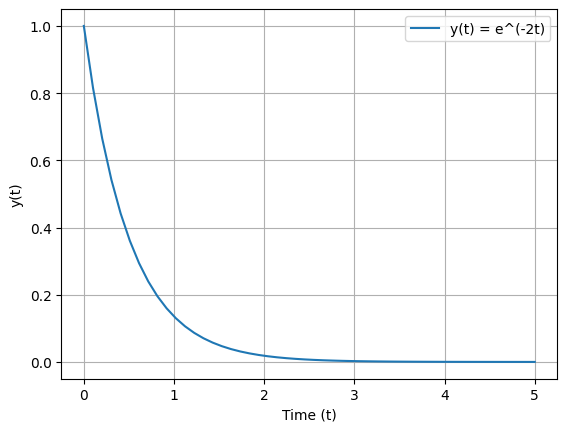

In [5]:
import matplotlib.pyplot as plt

plt.plot(solution.t, solution.y[0], label="y(t) = e^(-2t)")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()

### Choosing Different Solvers
* RK45: Default, Runge-Kutta 4(5) (adaptive)

* RK23: Lower-order Runge-Kutta

* BDF: Implicit solver for stiff equations

* LSODA: Auto-switching stiff/non-stiff solver

In [6]:
solution = solve_ivp(ode, t_span, y0, method="BDF")


## 5. Using odeint (Legacy)
Older approach using odeint:

In [7]:
from scipy.integrate import odeint

# Define ODE function
def ode(y, t):
    return -2 * y

t = np.linspace(0, 5, 50)
y0 = [1]  # Initial condition

solution = odeint(ode, y0, t)


### Why solve_ivp over odeint?

* solve_ivp supports event detection and better solvers.

* odeint is based on LSODA and doesn't support dense output.